In [1]:
import os
os.chdir('..')

In [2]:
data_folder = '../data/'
server_folder = './server/'
template_folder = './templates/'
figure_folder = '../figures/'

import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set(font_scale=1.5)

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
directions = ['grad', 'hess', 'bfgs', 'bfgs-inv', 'hybrid', 'hybrid-inv']
types = ['LS', 'LS-ABS', 'TR', 'TR-ABS']

unfeasible = ['TR_grad', 'TR-ABS_grad', 'LS_hybrid', 'TR_hybrid', 'TR_bfgs-inv', 'TR-ABS_bfgs-inv', 'LS_hybrid-inv', 'TR_hybrid-inv', 'TR-ABS_hybrid-inv']

combinations = []

# Add all combinations
for d in directions:
    for t in types:
        str_ = t + '_' + d
        
        if str_ not in unfeasible:
            combinations.append(str_)

In [4]:
models = {'large': [
              'LPMC_MNL_RR_S',
              'LPMC_MNL_RR_M',
              'LPMC_MNL_RR_L',
              'LPMC_MNL_Full_S',
              'LPMC_MNL_Full_M',
              'LPMC_MNL_Full_L',
              'MTMC_MNL'],
          'small': [
              'SM_MNL', 
              'SM_Nested',
              'LPMC_MNL_DC_S', 
              'LPMC_MNL_DC_M', 
              'LPMC_MNL_DC_L'    
          ]
     }

In [8]:
dir_to_str = {'grad': 'Gradient',
              'hess': 'Hessian',
              'bfgs': 'BFGS',
              'bfgs-inv': 'BFGS$^{-1}$',
              'hybrid': 'Hybrid',
              'hybrid-inv': 'Hybrid$^{-1}$'}

groups = [['LS_grad', 'LS_hess', 'LS_bfgs', 'LS_bfgs-inv'],
          ['TR_hess', 'TR_bfgs'],
          ['LS-ABS_grad', 'LS-ABS_hess', 'LS-ABS_bfgs', 'LS-ABS_bfgs-inv', 'LS-ABS_hybrid', 'LS-ABS_hybrid-inv'],
          ['TR-ABS_hess', 'TR-ABS_bfgs', 'TR-ABS_hybrid']]

filenames = ['ls', 'tr', 'ls-amabs', 'tr-amabs']


styles = {
     'grad': {
        'line': ':',
        'color': 'black'
    },
    'hess': {
        'line': '--',
        'color': 'black'
    },
    'bfgs': {
        'line': '-.',
        'color': 'black',
    },
    'bfgs-inv': {
        'line': '-.',
        'color': 'gray'
    },
    'hybrid': {
        'line': '-',
        'color': 'black'
    },
    'hybrid-inv': {
        'line': '-',
        'color': 'gray'
    }   
}

[[0.         0.         0.         0.14285714 0.14285714 0.14285714]
 [0.         0.         0.         0.14285714 0.14285714 0.14285714]
 [0.         0.         0.         0.         0.28571429 0.42857143]
 [0.         0.         0.         0.28571429 0.42857143 0.71428571]
 [0.         0.28571429 0.85714286 0.85714286 0.85714286 1.        ]
 [0.         0.57142857 0.85714286 0.85714286 1.         1.        ]
 [0.         0.         0.42857143 1.         1.         1.        ]
 [0.         0.         0.57142857 0.85714286 1.         1.        ]
 [0.         0.         0.         0.         0.14285714 0.14285714]
 [0.         0.         0.         0.         0.14285714 0.14285714]
 [0.         0.28571429 0.85714286 1.         1.         1.        ]
 [0.         0.42857143 1.         1.         1.         1.        ]
 [0.         0.42857143 0.85714286 1.         1.         1.        ]
 [0.         0.         0.28571429 0.71428571 0.85714286 1.        ]
 [1.         1.         1.        

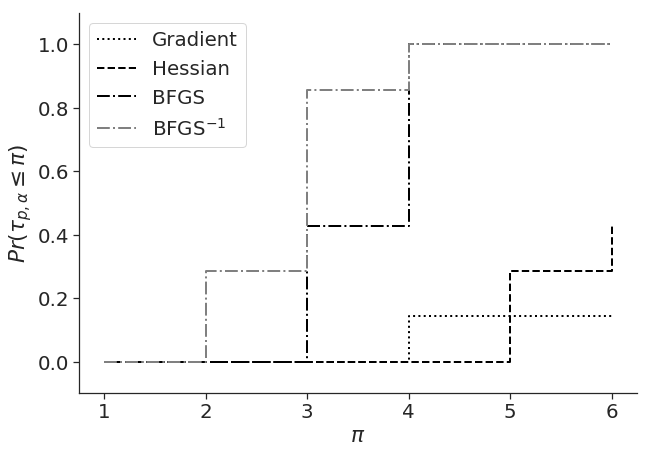

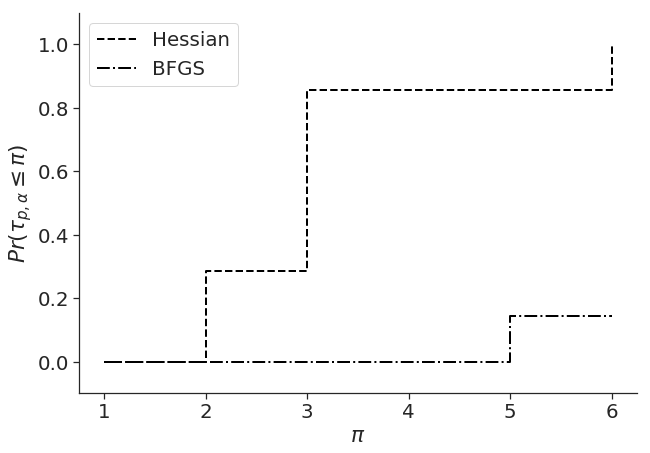

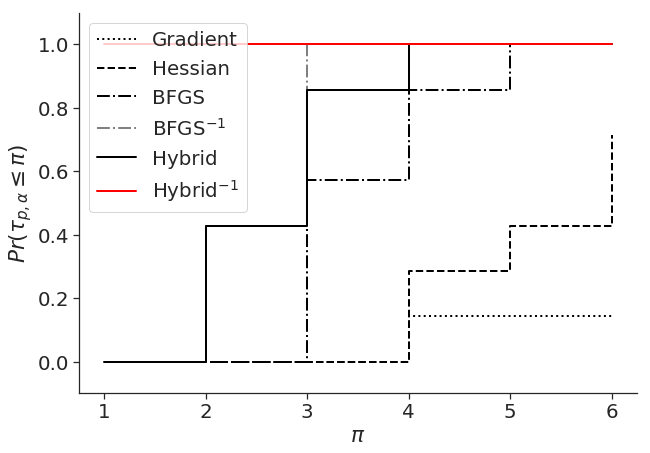

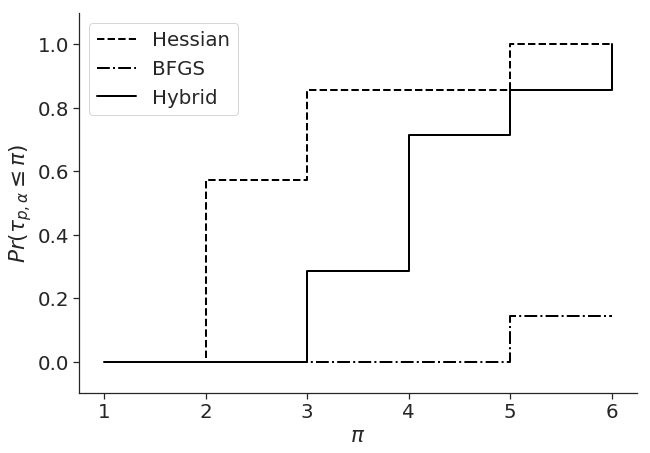

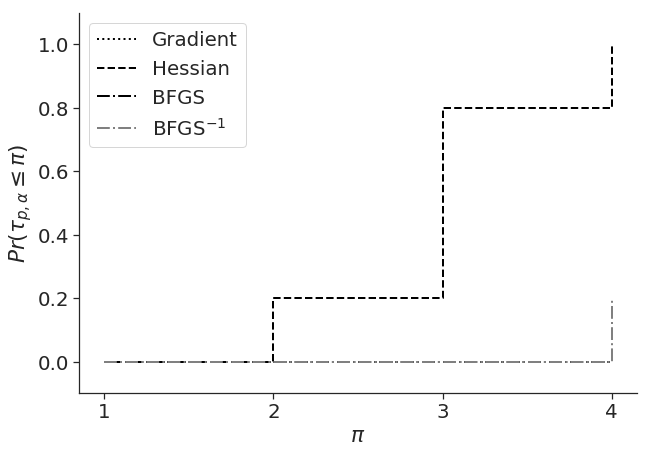

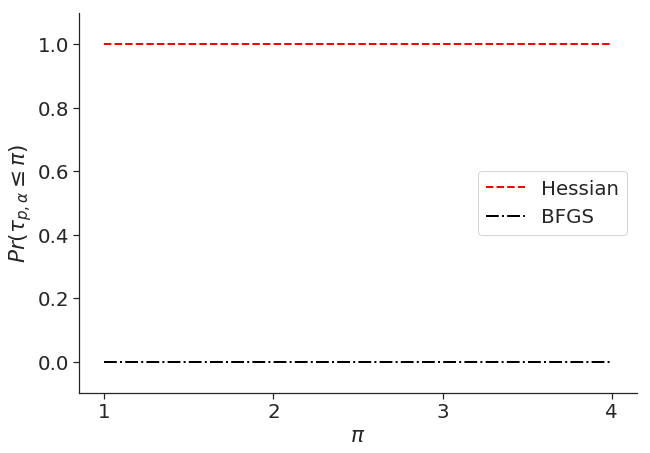

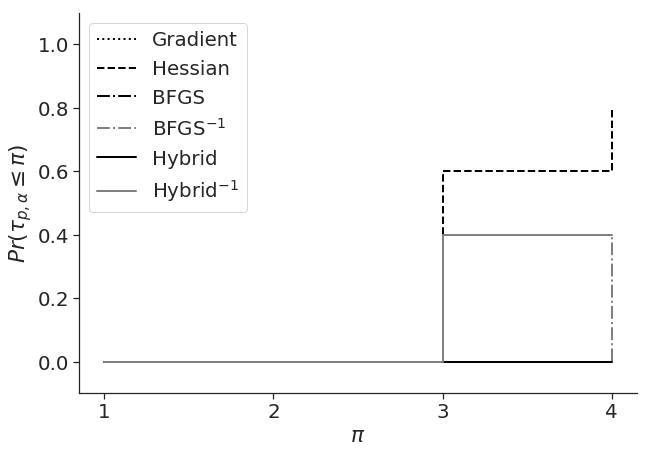

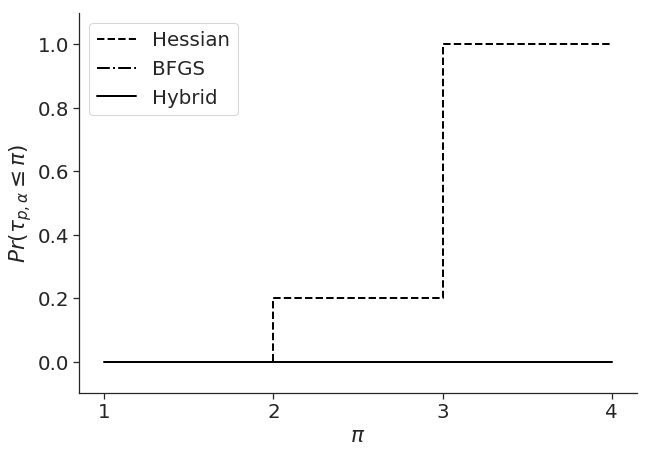

In [9]:
for mod_type in models.keys():

    n_models = len(models[mod_type])

    res = np.zeros((len(combinations), n_models))

    for j, mod in enumerate(models[mod_type]):
        for i, comb in enumerate(combinations):
            with open(server_folder + mod + '/results/' + comb + '.json', 'r') as infile:
                data = json.load(infile)

            res[i,j] = np.mean(data['time']) 

    min_col = np.min(res, axis=0)

    for k in range(n_models):
        res[:,k] = res[:,k]/min_col[k]

    points = list(range(1,n_models))

    perf = np.zeros((len(combinations), len(points)))

    for j, pi in enumerate(points):

        for i in range(len(combinations)):

            perf[i,j] = np.sum(res[i,:] <= pi)/len(res[i,:])

    print(perf)

    for f, g in zip(filenames, groups):

        plt.figure(figsize=(10, 7), frameon=False)

        sns.set_context("paper")
        sns.set(font_scale = 1.8)
        sns.set_style("white", {
            "font.family": "sans-serif",
            "font.serif": ['Helvetica'],
        })
        sns.set_style("ticks", {"xtick.major.size": 4,
                                "ytick.major.size": 4})

        ax = plt.subplot(111)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        for i, c in enumerate(combinations):

            if c in g:

                #label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]
                label = dir_to_str[c.split('_')[1]]

                color = styles[c.split('_')[1]]['color']
                linestyle = styles[c.split('_')[1]]['line'] 

                label = label.replace('ABS', 'AMABS')
                
                if (mod_type == 'small' and c == 'TR_hess') or (mod_type == 'large' and c == 'LS-ABS_hybrid-inv'):
                    color = 'red'

                plt.step(points, perf[i,:], where='post', linestyle=linestyle, linewidth=2, color=color, label=label)

        plt.legend()
        plt.xlabel('$\pi$')
        plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
        plt.ylim([-0.1, 1.1])
        plt.xticks(range(1,n_models), list(range(1,n_models)))

        plt.savefig(figure_folder + 'png/perf_profile_' + mod_type + '_' + f + '.png', bbox_inches='tight')
        plt.savefig(figure_folder + 'pdf/perf_profile_' + mod_type + '_' + f + '.pdf', bbox_inches='tight')